Convolutional Neural Networks
======

Convolutional neural networks (CNNs) are a class of deep neural networks, most commonly used in computer vision applications.

Convolutional refers the network pre-processing data for you - traditionally this pre-processing was performed by data scientists. The neural network can learn how to do pre-processing *itself* by applying filters for things such as edge detection.

Step 1
-----

In this exercise we will train a CNN to recognise handwritten digits, using the MNIST digit dataset.

This is a very common exercise and data set to learn from.

Let's start by loading our dataset and setting up our train, validation, and test sets.

#### Run the code below to import our required libraries and set up the graphing features.

In [1]:
# Run this!
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
print('keras using %s backend'%keras.backend.backend())
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


### In the cell below replace:
#### 1. `<addTrainX>` with `train_X`
#### 2. `<addTrainY>` with `train_Y`
#### 3. `<addValidX>` with `valid_X`
#### 4. `<addValidY>` with `valid_Y`
#### 5. `<addTextX>` with `test_X`
#### 6. `<addTextY>` with `test_Y`
#### and then __run the code__.

In [2]:
# Here we import the dataset, and split it into the training, validation, and test sets.
from keras.datasets import mnist

# This is our training data, with 6400 samples.
###
# REPLACE <addTrainX> WITH train_X AND <addTrainY> WITH train_Y
###
train_X = mnist.load_data()[0][0][:6400].astype('float32')
train_Y = mnist.load_data()[0][1][:6400]
###

# This is our validation data, with 1600 samples.
###
# REPLACE <addValidX> WITH valid_X AND <addValidY> WITH valid_Y
###
valid_X = mnist.load_data()[1][0][:1600].astype('float32')
valid_Y = mnist.load_data()[1][1][:1600]
###

# This is our test data, with 2000 samples.
###
# REPLACE <addTextX> WITH test_X AND <addTextY> WITH test_Y
###
test_X = mnist.load_data()[1][0][-2000:].astype('float32')
test_Y = mnist.load_data()[1][1][-2000:]
###

print('train_X:', train_X.shape, end = '')
print(', train_Y:', train_Y.shape)
print('valid_X:', valid_X.shape, end = '')
print(', valid_Y:', valid_Y.shape)
print('test_X:', test_X.shape, end = '')
print(', test_Y:', test_Y.shape)

train_X: (6400, 28, 28), train_Y: (6400,)
valid_X: (1600, 28, 28), valid_Y: (1600,)
test_X: (2000, 28, 28), test_Y: (2000,)


So we have 6400 training samples, 1600 validation samples, and 2000 test samples.

Each sample is an greyscale image - 28 pixels wide and 28 pixels high. Each pixel is really a number from 0 to 255 - 0 being fully black, 255 being fully white. When we graph the 28x28 numbers, we can see the image.

Let's have a look at one of our samples.

#### Replace `<addSample>` with `train_X[0]` (you can change 0 to any number between 0 and 6400 if you like)

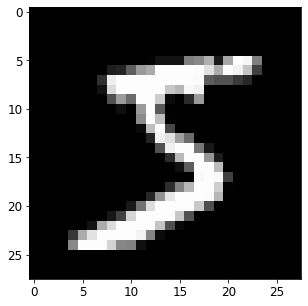

In [3]:
###
# REPLACE THE <addSample> BELOW WITH train_X[0] OR ANOTHER SAMPLE e.g. train_X[1] or train_X[2]
###
graph.imshow(train_X[0], cmap = 'gray', interpolation = 'nearest')
###

graph.show()

Step 2
---

The neural network will use the 28x28 values of each image to predict what each image represents.

As each value is between 0 and 255, we'll scale the values down by dividing by 255 (this makes it faster for the Neural Network to train).

We need to reshape our data to get it working well with our neural network. 

### In the cell below replace:
#### 1. `<addRehape>` with `reshape`
#### 2. `<completeCalculation>` with `/255`
#### and then __run the code__.

In [4]:
print(train_Y[0])

5


In [5]:
# First off, let's reshape our X sets so that they fit the convolutional layers.

# This gets the image dimensions - 28
dim = train_X[0].shape[0]

###
# REPLACE THE <addRehape> BELOW WITH reshape
###
train_X = train_X.reshape(train_X.shape[0], dim, dim, 1)
valid_X = valid_X.reshape(valid_X.shape[0], dim, dim, 1)
test_X = test_X.reshape(test_X.shape[0], dim, dim, 1)
###

# Next up - feature scaling.
# We scale the values so they are between 0 and 1, instead of 0 and 255.

###
# REPLACE THE <completeCalculation> BELOW WITH /255
###
train_X = train_X/255
valid_X = valid_X/255
test_X = test_X/255
###


# Now we print the label for the first example
print(train_Y[0])

5


Expected output:  
`5`

The label is a number - the number we see when we view the image.

We need represent this number as a one-hot vector, so the neural network knows it is a category.

Keras can convert these labels into one-hot vectors easily with the function - `to_categorical`

#### Replace `<addCategorical>` with `to_categorical`

In [6]:
###
# REPLACE THE <addCategorical> BELOW WITH to_categorical
###
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)
###

# 10 being the number of categories (numbers 0 to 9)

print(train_Y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Expected output:  
`[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]`

Step 3
-----

All ready! Time to build another neural network.

#### Replace `<addSequential>` with `Sequential()` and run the code.

In [7]:
# Sets a randomisation seed for replicatability.
np.random.seed(6)

###
# REPLACE THE <addSequential> BELOW WITH Sequential() (don't forget the () )
###
model = Sequential()
###

The __Convolutional__ in Convolutional Neural Networks refers the pre-processing the network can do itself.

#### Replace `<addConv2d>` with `Conv2D`

In [8]:
###
# REPLACE THE <addConv2D> BELOW WITH Conv2D
###
model.add(Conv2D(28, kernel_size = (3, 3), activation = 'relu', input_shape = (dim, dim, 1)))
model.add(Conv2D(56, (3, 3), activation = 'relu'))
###

Next up we'll:
* Add pooling layers.
* Apply dropout.
* Flatten the data to a vector (the output of step 2 is a vector).

### In the cell below replace:
#### 1. `<addMaxPooling2D>` with `MaxPooling2D`
#### 2. `<addDropout>` with `Dropout`
#### 3. `<addFlatten>` with `Flatten()`

#### and then __run the code__.

In [9]:
# Pooling layers help speed up training time and make features it detects more robust.
# They act by downsampling the data - reducing the data size and complexity.

###
# REPLACE THE <addMaxPooling2D> BELOW WITH MaxPooling2D
###
model.add(MaxPooling2D(pool_size = (2, 2)))
###

# Dropout is a technique to help prevent overfitting
# It makes nodes 'dropout' - turning them off randomly.

###
# REPLACE THE <addDropout> BELOW WITH Dropout
###
model.add(Dropout(0.125))
###


###
# REPLACE THE <addFlatten> BELOW WITH Flatten()
###
model.add(Flatten())
###

#### Replace `<updateHere>` with 10 and run the code.

In [10]:
# Dense layers perform classification - we have extracted the features with the convolutional pre-processing
model.add(Dense(128, activation='relu'))

# More dropout!
model.add(Dropout(0.25))

# Next is our output layer
# Softmax outputs the probability for each category
###
# REPLACE <updateHere> BELOW WITH 10, THE NUMBER OF CLASSES (DIGITS 0 TO 9)
###
model.add(Dense(10, activation=tf.nn.softmax))
###

# And finally, we compile.
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

Step 4
-----

Let's train it!

### In the cell below replace:
#### 1. `<addTrainX>` with `train_X `
#### 2. `<addTrainY>` with `train_Y`
#### 3. `<addValidX>` with `valid_X`
#### 4. `<addValidY>` with `valid_Y`
#### 5. `<addEvaluate>` with `evaluate`

#### and then __run the code__.

In [11]:
###
# REPLACE THE <addTrainX> WITH train_X, <addTrainY> WITH train_Y, <addValidX> WITH valid_X, AND <addValidY> WITH valid_Y
###
training_stats = model.fit(train_X, train_Y, batch_size = 128,\
    epochs = 12, verbose = 1, validation_data = (valid_X, valid_Y))
###

###
# REPLACE THE <addEvaluate> BELOW WITH evaluate
###
evaluation = model.evaluate(test_X, test_Y, verbose=0)
###

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100 * evaluation[1]))

# # We can plot our training statistics to see how it developed over time
# accuracy, = graph.plot(training_stats.history['accuracy'], label = 'Accuracy')
# training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')
# graph.legend(handles = [accuracy, training_loss])
# loss = np.array(training_stats.history['loss'])
# xp = np.linspace(0,loss.shape[0],10 * loss.shape[0])
# graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
# graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
# graph.show()

Epoch 1/12
50/50 [==============================] - 9s 179ms/step - loss: 0.8831 - accuracy: 0.7453 - val_loss: 0.5027 - val_accuracy: 0.8381
Epoch 2/12
50/50 [==============================] - 8s 163ms/step - loss: 0.3486 - accuracy: 0.8984 - val_loss: 0.3352 - val_accuracy: 0.9050
Epoch 3/12
50/50 [==============================] - 8s 165ms/step - loss: 0.2535 - accuracy: 0.9269 - val_loss: 0.2734 - val_accuracy: 0.9175
Epoch 4/12
50/50 [==============================] - 8s 160ms/step - loss: 0.1990 - accuracy: 0.9427 - val_loss: 0.2226 - val_accuracy: 0.9250
Epoch 5/12
50/50 [==============================] - 8s 161ms/step - loss: 0.1564 - accuracy: 0.9573 - val_loss: 0.1859 - val_accuracy: 0.9400
Epoch 6/12
50/50 [==============================] - 8s 165ms/step - loss: 0.1335 - accuracy: 0.9614 - val_loss: 0.1645 - val_accuracy: 0.9450
Epoch 7/12
50/50 [==============================] - 9s 170ms/step - loss: 0.1165 - accuracy: 0.9673 - val_loss: 0.1528 - val_accuracy: 0.9506
Epoch 

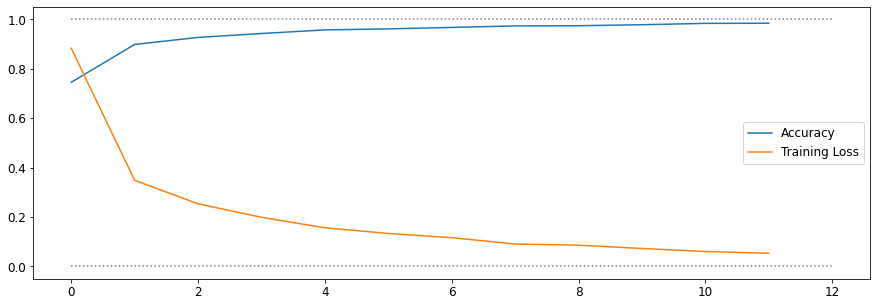

In [12]:
# We can plot our training statistics to see how it developed over time
accuracy, = graph.plot(training_stats.history['accuracy'], label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')
graph.legend(handles = [accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0,loss.shape[0],10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

## Step 5

Let's test it on a new sample that it hasn't seen, and see how it classifies it!

#### Replace `<addNumber>` with any number between 0 and 1999, then run the code.

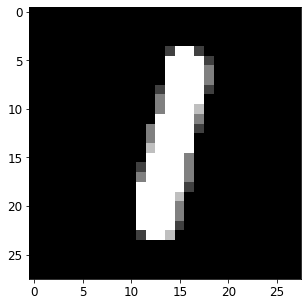

prediction: 1


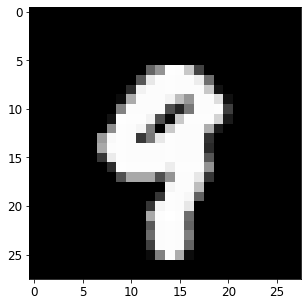

prediction: 9


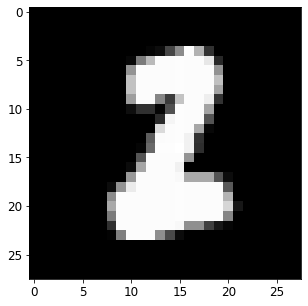

prediction: 2


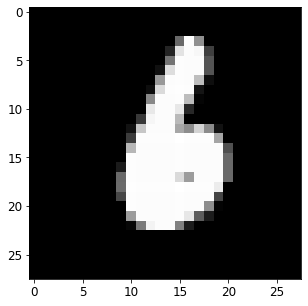

prediction: 6


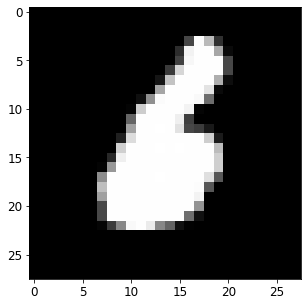

prediction: 6


In [13]:
###
# REPLACE THE <addNumber> WITH ANY NUMBER BETWEEN 0 AND 1999
###
for i in range(100,105):
    sample = test_X[i].reshape(dim, dim)
    ###

    graph.imshow(sample, cmap = 'gray', interpolation = 'nearest')
    graph.show()

    prediction = model.predict(sample.reshape(1, dim, dim, 1))
    print('prediction: %i' %(np.argmax(prediction)))

How is the prediction? Does it look right?

Conclusion
------

Congratulations! We've built a convolutional neural network that is able to recognise handwritten digits with very high accuracy.

CNN's are very complex - you're not expected to understand everything (or most things) we covered here. They take a lot of time and practise to properly understand each aspect of them.

Here we used:  
* __Feature scaling__ - reducing the range of the values. This helps improve training time.
* __Convolutional layers__ - network layers that pre-process the data for us. These apply filters to extract features for the neural network to analyze.
* __Pooling layers__ - part of the Convolutional layers. They apply filters downsample the data - extracting features.
* __Dropout__ - a regularization technique to help prevent overfitting.
* __Dense layers__ - neural network layers which perform classification on the features extracted by the convolutional layers and downsampled by the pooling layers.
* __Softmax__ - an activation function which outputs the probability for each category.